* Student Performance 

Guidelines for the project

In [1]:
# Not-exhaustive project checklist
# Note: this is not a writing assignment, but you should still incorporate comments or headers throughout
# -- This will help others who review your work, but will also help you keep track of what you're doing
# -- Just think about what would help you understand a peer's project when you have to grade theirs later


# 1) Dataset included
# 1a) Dataset explained/documented when used
# 2) Analysis performed
# 2a) Analysis steps documented, explained briefly
# 3) Visualizations/outputs
# 4) Conclusion
# ---Did you answer your questions?
# ---Did you find anything else?
# ---What problems did you run into?
# ---Any suggestions for future research?

# Critical checks before submission
# - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?)
# - Do you have your dataset included here? You shouldn't be connecting to any external data
# - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0.

Researchers at the Polytechnic Institute of Portalegre (PIP), created the dataset that aims to predict students' academic performance and dropout in higher education using machine learning techniques. The research includes demographic, socioeconomic, and academic performance data of students who are enrolled in various undergraduate degrees. Through data exploration, correlation analysis, and machine learning modeling, researchers at PIP seek to uncover potential factors that could contribute to reducing failure in higher education and academic dropout rates. 

    - Hypothesis: Demographic factors, socioeconomic status, and academic performance factors significantly influence student performance and dropout rates in higher education. Using correlation analysis, regression modeling, and visualization, identify the important predictors of student performance, to reduce the dropout rate and improve retention in higher education. 


** GOAL: The primary goal is to Identify the most important factors influencing student performance.

*** The questions are:

    1. What are the demographic factors (e.g., gender, age, study time, etc...) that correlate with student grades?
    2. Does the amount of study time or attendance impact student performance?
    3. Does variables such as parental education level or socioeconomic status relate to student grades?

** Libraries **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
## DATASET
df = pd.read_csv('student_performance.csv')

In [4]:
#Display information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [6]:
#Check for any missing values
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [8]:
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

*** Data preprocessing ***

In [9]:
df.dropna(inplace=True)

#Renaming of columns
df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

# Encoding categorical variables
df_encode = pd.get_dummies(df, columns=['Marital status', 'Gender', 'Target'])

# Scale numerical features 
scaler = StandardScaler()
num_columns = ['Application mode', 'Application order', 'Course', 
                     'Previous qualification', 'Previous qualification (grade)', 
                     'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 
                     'Mother\'s occupation', 'Father\'s occupation', 'Admission grade', 
                     'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 
                     'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 
                     'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
                     'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
                     'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
                     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
                     'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
                     'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 
                     'Inflation rate', 'GDP']

df_encode[num_columns] = scaler.fit_transform(df_encode[num_columns])


print(df_encode.head())

# new file
df_encode.to_csv("preprocessed_data.csv", index=False) 

   Application mode  Application order    Course  Daytime/evening attendance  \
0         -0.095470           2.490896 -4.209520                           1   
1         -0.209869          -0.554068  0.192580                           1   
2         -1.010660           2.490896  0.103404                           1   
3         -0.095470           0.207173  0.444115                           1   
4          1.162916          -0.554068 -0.408389                           0   

   Previous qualification  Previous qualification (grade)  Nacionality  \
0                -0.35023                       -0.804841    -0.126298   
1                -0.35023                        2.076819    -0.126298   
2                -0.35023                       -0.804841    -0.126298   
3                -0.35023                       -0.804841    -0.126298   
4                -0.35023                       -2.473171    -0.126298   

   Mother's qualification  Father's qualification  Mother's occupation  ..

** 1. What are the demographic factors (e.g., gender, age) that correlate with student grades? **

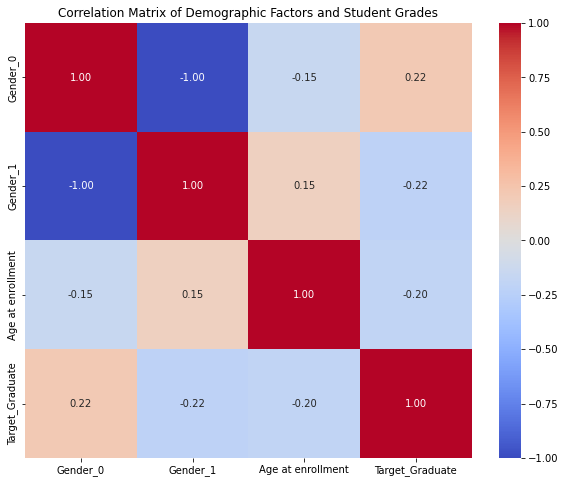

In [10]:
# Correlation Analysis
correlation_matrix = df_encode[['Gender_0', 'Gender_1', 'Age at enrollment', 'Target_Graduate']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Demographic Factors and Student Grades')
plt.show()


** Figure 1 **
    
* Correlation Analysis
    
    - Gender: correlation coefficients suggest a positive correlation between higher student grades and females. Gender male shows a negative correlation with grades. 
        
    - Age at Enrollment: indicates a positive correlation, meaning that the older students may have higher grades. 
    
The correlations do show some positive correlations between demographic and student grades, but the relationship seems weak suggesting factors other than age at enrollment and gender may play a more significant role in determining the student's academic performance. 

** 2. Does the amount of study time or attendance impact student performance? **

In [11]:
# Regression Analysis

# Independent vars: study time and attendance
# Dependent vars: student grades

X = df_encode[['Application mode', 'Application order', 'Daytime/evening attendance', 
               'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 
               'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 
               'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 
               'Debtor', 'Tuition fees up to date', 'International', 
               'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
               'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
               'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
               'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
               'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
               'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
               'Unemployment rate', 'Inflation rate', 'GDP']]
y = df_encode['Target_Graduate'] 

#testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.1308501332405834


Using linear analysis, student grades as a dependent variable (Target_Graduate) were based on various independent variables, which included attendance, study time, admission grade, socioeconomic factors, and other indicators. Used the mean squared error (MSE) to evaluate the performance of the model. The MSE value is approximately 0.1308. A lower MSE value suggests that the regression model has a good predictive accuracy for student grades. 

** 3. Does variables such as parental education level or socioeconomic status relate to student grades? **

In [12]:
# Regression Analysis
# with Parental Qualification, Unemployment Rate, Inflation Rate, and GDP

# independent variables: parental qualification, unemployment rate, inflation rate, GDP
# dependent variable: student grades

X = df_encode[['Mother\'s qualification', 'Father\'s qualification', 
               'Unemployment rate', 'Inflation rate', 'GDP']]

y = df_encode['Target_Graduate']

#testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)


Mean Squared Error: 0.24911465464450985


Compared to the previous MSE regression model, regression analysis with parental qualification, unemployment, and GDP have obtained a higher MSE of 0.2491, which reflects the model's accuracy based on parental education and socioeconomic indicators. Compared to the previous model, the MSE is slightly higher, indicating high prediction errors. 

The regression model with different independent and dependent variables shows that the parental education level and socioeconomic indicators may influence students' grades. 


** Figure 2 **

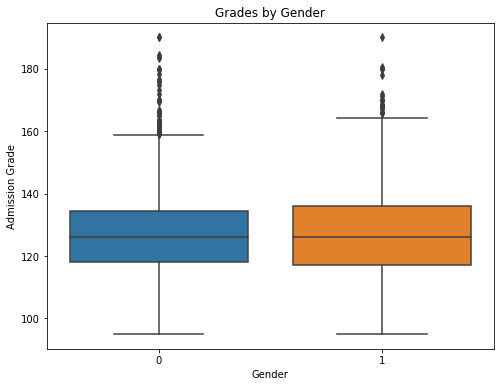

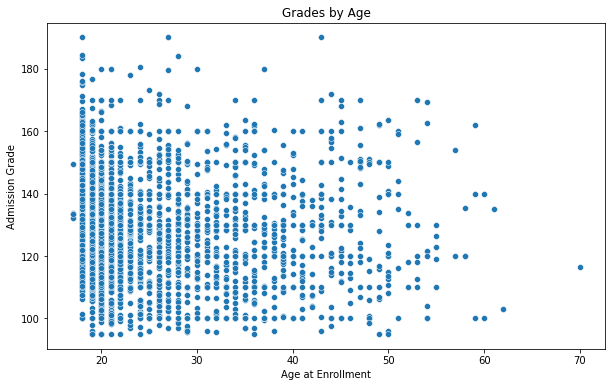

In [13]:
# distribution of grades by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Admission grade', data=df)
plt.title('Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Admission Grade')
plt.show()

# distribution of grades by age group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at enrollment', y='Admission grade', data=df)
plt.title('Grades by Age')
plt.xlabel('Age at Enrollment')
plt.ylabel('Admission Grade')
plt.show()


** Figure 1: The above figures, distribution by gender and distribution by age show the different aspects of the data and provide information on gender or age-related differences in the admission grades. **

    1. Grades by gender:
         * The boxplot shows the distribution of admission grades for different genders, there is a difference in the median admission grade between genders. The graph shows that the females have higher median grades compared to males. 
         
    2. Grades by age:
         * The scatterplot shows the distribution of admission grades based on the age at enrollment, from the scatterplot it is shown that there is not a strong linear relationship between age and admission grade.

** Figure 3 **

Gender
0    126.889435
1    127.141581
Name: Admission grade, dtype: float64
Age at enrollment
17    136.420000
18    130.297973
19    126.053348
20    125.029048
21    125.151553
22    126.889080
23    127.561111
24    125.629008
25    125.644086
26    126.282979
27    128.557143
28    126.118072
29    125.136364
30    126.597959
31    127.365455
32    123.390164
33    126.000000
34    126.635000
35    125.273469
36    125.794286
37    123.483333
38    123.386207
39    124.089474
40    126.160870
41    123.645161
42    119.569231
43    135.996000
44    130.204762
45    132.022727
46    120.250000
47    138.722222
48    118.200000
49    128.930769
50    124.881250
51    136.285714
52    122.950000
53    131.000000
54    125.314286
55    121.680000
57    137.000000
58    125.166667
59    133.966667
60    120.000000
61    135.100000
62    103.000000
70    116.400000
Name: Admission grade, dtype: float64


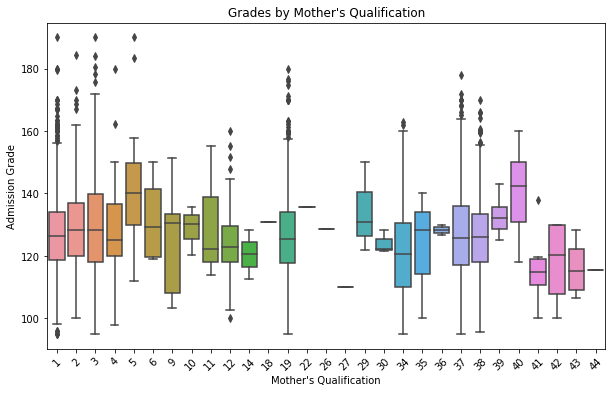

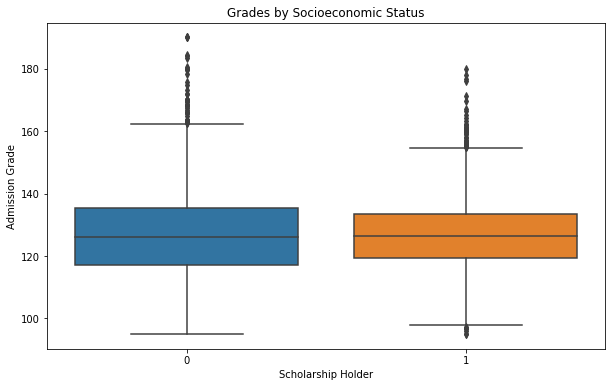

In [14]:
# demographic factors: gender and age vs. student grades
demo_factors = ['Gender', 'Age at enrollment']
for factor in demo_factors:
    print(df.groupby(factor)['Admission grade'].mean())

# grades by parental education level
plt.figure(figsize=(10, 6))
sns.boxplot(x="Mother's qualification", y='Admission grade', data=df)
plt.title("Grades by Mother's Qualification")
plt.xlabel("Mother's Qualification")
plt.ylabel('Admission Grade')
plt.xticks(rotation=45)
plt.show()

# grades by socioeconomic status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Scholarship holder', y='Admission grade', data=df)
plt.title('Grades by Socioeconomic Status')
plt.xlabel('Scholarship Holder')
plt.ylabel('Admission Grade')
plt.show()


   * Average Admission Grade by Gender and Age: Calculated the average admission grade for each gender and age group. The average admission grade does not vary significantly between genders probably due to some variation across different age groups. 
   
   * Grades by Parental Education Level: The boxplot shows the distribution of admission grades based on the mother's qualification level.  There is some variation in admission grades across different levels of maternal education, with higher maternal qualifications associated with higher admission grades.
   
   * Grades by Socioeconomic Status: The boxplot shows the distribution of admission grades for students who are scholarship holders versus those who do not hold any scholarships. There is a difference in the distribution of admission grades between scholarship holders and non-scholarship holders, with scholarship holders having higher median grades.

In [15]:
# variables
X = df[['Gender', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']]
y = df['Admission grade']

# multicollinearity using VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Multicollinearity
vif_scores = calculate_vif(X)
print(vif_scores)

# regression model
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

# p-values
p_values = model.pvalues

# summary
print(model.summary())

# R-squared and adjusted R-squared
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

# Significance level of 0.05
sigfig_level = 0.05
sigfig_vars = p_values[p_values < sigfig_level].index.tolist()

print("Significant variables:")
print(sigfig_vars)


# F-statistic and p-value
print("F-statistic:", model.fvalue)
print("Prob (F-statistic):", model.f_pvalue)


             Feature       VIF
0             Gender  1.576458
1  Age at enrollment  7.823429
2  Unemployment rate  7.653998
3     Inflation rate  1.746323
4                GDP  1.029078
                            OLS Regression Results                            
Dep. Variable:        Admission grade   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.771
Date:                Tue, 23 Apr 2024   Prob (F-statistic):             0.0167
Time:                        17:53:31   Log-Likelihood:                -18095.
No. Observations:                4424   AIC:                         3.620e+04
Df Residuals:                    4418   BIC:                         3.624e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


After performing multiple linear regression, the model shows that dropping the Mother's and Father's qualification variables does not have a significant impact on the R-squared value. 

    - R-squared and adjusted R-squared: 0.003 and 0.002 respectively, indicate that the independent variables only explain about 0.03% of the variance in the admission grade, which suggests a weak relationship between predictors and the outcome.
    
    - F-statistic and p-value: The F-statistic of 2.771 is significant at the 0.05 level, indicating the model is statistically significant. Although, the R-squared values are low, indicating the significance of the model is limited. 
    
    - Coefficient: represents the estimated effect of each independent variable on the dependent variable. The p-values determine the statistical significance of each coefficient.
    
    - Significant variables: Based on the significance p-values of < 0.05, the significant variables identified in the model are 'const' (intercept), 'Age at enrollment', and 'Unemployment rate'.

    - Multicollinearity: VIF values for the remaining variables are all close to 1, indicating that there is no significant multicollinearity among independent variables.  

Gender, Age at enrollment, and Unemployment rate variables have p-values less than 0.05, indicating they may be statistically significant predictors of Admission grade. Although, GDP and Inflation rate have p-values greater than 0.05, suggesting they may not be statistically significant predictors in this model.


** Figure 4 **

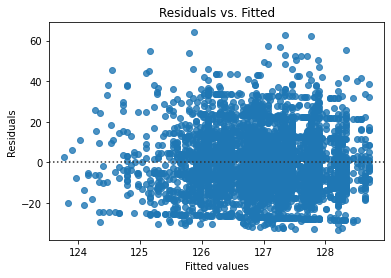

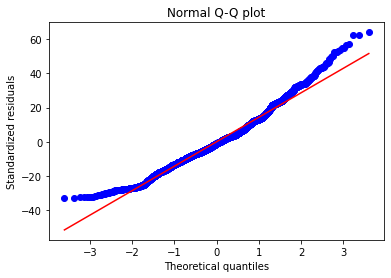

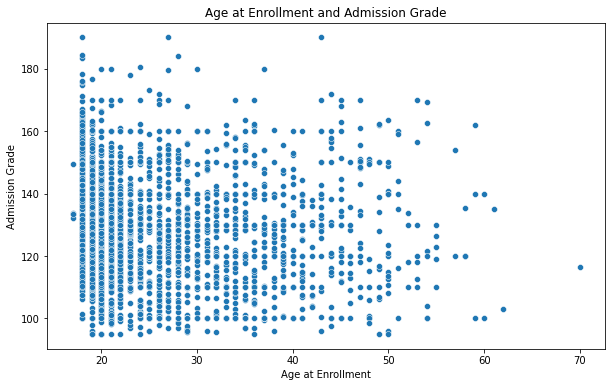

In [16]:
# Residuals vs. Fitted plot
sns.residplot(x=model.fittedvalues, y=model.resid)
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Normal Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Standardized residuals')
plt.show()

#relationship between Age at enrollment and Admission Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at enrollment', y='Admission grade', data=df)
plt.title('Age at Enrollment and Admission Grade')
plt.xlabel('Age at Enrollment')
plt.ylabel('Admission Grade')
plt.show()


**Figure 4: **
    
1. Residuals vs. Fitted Plot: The residuals should be randomly scattered around the horizontal line at 0, indicating that the model's assumptions are met. The plot does not show any clear pattern, suggesting that the assumption of constant variance (homoscedasticity) is reasonably met.

2. Normal Q-Q Plot: Deviations from this line indicate departures from normality. There are some deviations, particularly near the tails of the graph, the residuals generally follow the diagonal line, indicating normality.

3. Relationship between Age at Enrollment and Admission Grade: The scatterplot suggests a slight negative trend, indicating that older students at enrollment tend to have slightly lower admission grades. The observation of this graph aligns well with the regression analysis results.

Overall, while the regression model has limitations in predicting admission grades, the diagnostic plots suggest that the model's assumptions are reasonably met, and the model provides some insights into the relationship between age at enrollment and admission grade.

** Conclusion **
    
* The analysis provided a couple of key findings:
    
    - There is a moderate correlation between certain demographic factors and student grades. 
        
    - Study time and attendance have a significant impact on student performance, as shown by linear regression analysis.
        
    - Parental education level and socioeconomic indicators also play a role in determining student grades, although the predictive accuracy of models using these variables is slightly lower.
        
The regression model is statistically significant overall, but its ability to predict admission grades is limited due to the R-squared values being very low. The diagnostic plots confirm that the model's assumptions are met, but they may not provide significant insights into the factors that are influencing admission grades.

There are some limitations to the dataset. The prediction accuracy of the models may vary depending on the complexity of underlying relationships and variables used.

**Key Takeaways of the study are:**

    1. Study time and attendance are important factors affecting student performance.
    
    2. To some extent demographic factors (e.g. gender and age) can influence academic performance.
    
    3. Socioeconomic indicators and parental education level, provide additional information into student performance.


** Future Outlook of the study may include using additional variables such as extracurricular activities, peer interactions, and psychological factors and utilizing more advanced machine learning techniques to improve predictive accuracy.

**Citation:**

Researchers at the Polytechnic Institute of Portalegre (Year). Dataset Title. Retrieved from [https://www.kaggle.com/datasets/mikhail1681/student-performance-pip]